In [257]:
import json
from bs4 import BeautifulSoup
import requests
import urllib
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

In [572]:
agent='Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'
header_info={'user-agent':agent,'referer':None}

In [579]:
driver = webdriver.Chrome()
base_url='https://pcmap.place.naver.com'

In [476]:
driver.get('https://map.naver.com/v5/search/%EC%A0%9C%EC%A3%BC%ED%8A%B9%EB%B3%84%EC%9E%90%EC%B9%98%EB%8F%84%20%ED%95%9C%EC%8B%9D?c=14030736.5496444,3952164.0916793,8,0,0,0,dh')

In [477]:
url_list=[]
driver.switch_to_frame(driver.find_element_by_id('searchIframe'))
bs=BeautifulSoup(driver.page_source,'html.parser')
for i in range(len(bs.select('#app-root > div > div:nth-child(2) > div:nth-child(2) > a'))-1):
    while bs.select('#_pcmap_list_scroll_container > ul > .lazyload-placeholder'):
        some_tag=driver.find_element_by_css_selector('#_pcmap_list_scroll_container > ul > .lazyload-placeholder')
        action=ActionChains(driver)
        action.move_to_element(some_tag).perform()
        bs=BeautifulSoup(driver.page_source,'html.parser')
    for y in range(1,len(bs.select('#_pcmap_list_scroll_container > ul > li'))+1):
        cont=False
        a=WebDriverWait(driver,10).until(lambda x:x.find_element_by_css_selector('#_pcmap_list_scroll_container > ul > li:nth-child(%s) > div > a'%y))
        driver.execute_script("arguments[0].click();",a)
        time.sleep(1)
        driver.switch_to.default_content()
        driver.switch_to_frame(driver.find_element_by_id('entryIframe'))
        
        some_tag=driver.find_element_by_css_selector('#app-root > div > footer')
        action=ActionChains(driver)
        action.move_to_element(some_tag).perform()
        time.sleep(1.5)
        if not BeautifulSoup(driver.page_source,'html.parser').select('div[data-nclicks-area-code="rrr"]'):
            action.move_to_element(some_tag).perform()
            time.sleep(1.5)
        for v in range(3):
            bs=BeautifulSoup(driver.page_source,'html.parser')
            if not bs.select('div[data-nclicks-area-code="rrr"] > div:nth-child(3) > a') and v<2:
                continue
            elif not bs.select('div[data-nclicks-area-code="rrr"] > div:nth-child(3) > a') and v==2:
                cont=True
            else:
                break
        if cont:
            driver.switch_to.default_content()
            driver.switch_to_frame(driver.find_element_by_id('searchIframe'))
            continue
        url_list.append(base_url+bs.select('div[data-nclicks-area-code="rrr"] > div:nth-child(3) > a[href]')[0].attrs['href'])
        driver.switch_to.default_content()
        driver.switch_to_frame(driver.find_element_by_id('searchIframe'))
    a=WebDriverWait(driver,10).until(lambda x:x.find_element_by_css_selector('#app-root > div > div:nth-child(2) > div:nth-child(2) > a:nth-last-child(1)'))
    driver.execute_script("arguments[0].click();",a)
    bs=BeautifulSoup(driver.page_source,'html.parser')

/var/folders/_g/kl94k0td3h1gy80byz1z3wbc0000gn/T/ipykernel_27914/714513396.py:2: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame(driver.find_element_by_id('searchIframe'))
/var/folders/_g/kl94k0td3h1gy80byz1z3wbc0000gn/T/ipykernel_27914/714513396.py:16: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame(driver.find_element_by_id('entryIframe'))
/var/folders/_g/kl94k0td3h1gy80byz1z3wbc0000gn/T/ipykernel_27914/714513396.py:39: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame(driver.find_element_by_id('searchIframe'))


In [481]:
driver.switch_to.default_content()

In [568]:
len(url_list)

300

In [567]:
with open('기타/url_list.text','w',encoding='utf-8') as f:
    for i in url_list:
        f.write(i+'\n')

In [571]:
url_list[1]

'https://pcmap.place.naver.com/restaurant/11866447/review/visitor?reviewItem=0&theme=allTypes&isPhotoUsed=false&order=NaN'

In [527]:
#bs=BeautifulSoup(driver.page_source,'html.parser')
bs.select('div[data-nclicks-area-code="rrv"] > .place_section > div > ul li')[0].select('div > div:nth-child(2) > div > span:nth-child(2)')[0].text
bs.select('div[data-nclicks-area-code="rrv"] > .place_section > div > ul li > div')[0].select('div > div:nth-child(3)')[0].text

'5'

In [732]:
naver_review=[]
for i in url_list[150:]:
    driver.get(i)
    while True:
        bs=BeautifulSoup(driver.page_source,'html.parser')
        if bs.select('div[data-nclicks-area-code="rrv"] > .place_section > div >a[target="_self"]'):
            a=WebDriverWait(driver,10).until(lambda x:x.find_element_by_css_selector('div[data-nclicks-area-code="rrv"] > .place_section > div >a[target="_self"]'))
            driver.execute_script("arguments[0].click();",a)
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(0.5)
        else:
            bs=BeautifulSoup(driver.page_source,'html.parser')
            for i in bs.select('div[data-nclicks-area-code="rrv"] > .place_section > div > ul li > div'):
                if not i.select('div > div:nth-last-child(1) > a'):
                    continue
                if 'style' not in i.select('div > div:nth-last-child(1) > a')[-1].attrs:
                    continue
                if not i.select('div > div:nth-child(2)')[1].select('a'):
                    score=i.select('div > div:nth-child(2) > div > span:nth-child(2)')[0].text
                    review=i.select('div > div:nth-last-child(1) > a > span')[0].text
                    naver_review.append({score:review})
                else:
                    score=i.select('div > div:nth-child(3) > div > span:nth-child(2)')[0].text
                    review=i.select('div > div:nth-last-child(1) > a > span')[0].text
                    naver_review.append({score:review})
            break

In [729]:
bs=BeautifulSoup(driver.page_source,'html.parser')
for i in bs.select('div[data-nclicks-area-code="rrv"] > .place_section > div > ul li > div'):
    if not i.select('div > div:nth-last-child(1) > a'):
        continue
    if 'style' not in i.select('div > div:nth-last-child(1) > a')[-1].attrs:
        continue
    if not i.select('div > div:nth-child(2)')[1].select('a'):
        score=i.select('div > div:nth-child(2) > div > span:nth-child(2)')[0].text
        review=i.select('div > div:nth-last-child(1) > a > span')[0].text
        naver_review.append({score:review})
    else:
        score=i.select('div > div:nth-child(3) > div > span:nth-child(2)')[0].text
        review=i.select('div > div:nth-last-child(1) > a > span')[0].text
        naver_review.append({score:review})

In [731]:
for i,v in enumerate(url_list):
    if v == 'https://pcmap.place.naver.com/restaurant/1131393322/review/visitor?reviewItem=0&theme=allTypes&isPhotoUsed=false&order=NaN':
        print(i,v)

149 https://pcmap.place.naver.com/restaurant/1131393322/review/visitor?reviewItem=0&theme=allTypes&isPhotoUsed=false&order=NaN


In [725]:
url_list[126]

'https://pcmap.place.naver.com/restaurant/12830391/review/visitor?reviewItem=0&theme=allTypes&isPhotoUsed=false&order=NaN'

In [733]:
len(naver_review)

61260

In [735]:
naver_backup=naver_review

In [736]:
len(naver_backup)

61260

In [737]:
for i in naver_backup:
    naver_df=naver_df.append(pd.DataFrame({'text':i.values(),'label':i.keys()}))

In [741]:
naver_df.groupby('label').count()

,text
label,
0.5,3176
1,1849
1.5,733
2,1801
2.5,1491
3,5810
3.5,4577
4,20160
4.5,13758


In [739]:
naver_df.to_csv('기타/naver_review.csv',encoding='utf-8',index=False)

In [740]:
pd.read_csv('기타/naver_review.csv')

,text,label
0,왜? 맞집일까요?\n빈대떡은 타고 기름이..넘쳐나고\n내가 왜 왔을까요?,0.5
1,친절과 위생은 ㅎㅎ.. 그치만 맛있어요,5.0
2,늘 맛있는 곳,5.0
3,별 다섯개주기엔 대기가 넘 길어요 이정도면 확장하셔요~~~ 포장하면 호딱들고갈수있음...,4.0
4,소문대로 맛나요,5.0
...,...,...
158727,제주하면 뭐다 ? 갈치조림 ~~~~🧡 서비스도 넉넉해서 배터져죽을뻔했어요 ㅠㅠㅠ 담...,5.0
158728,별한개도 아깝습니다. 처음으로 리뷰쓸려고 영수증 리뷰에 가입했습니다.해물뚝배기 먹었...,1.0
158729,성게미역국은 밍밍 \n조림만 그나마 먹을만,3.0
158730,"전복해물뚝배기 먹었는데\n가격은 15,000원 대비\n그냥저냥 먹을만하다",4.0


# Google 지도

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get('https://www.google.co.kr/maps')

In [4]:
elem = driver.find_element_by_name("q")
elem.send_keys('제주특별자치도 한식')
elem.send_keys(Keys.RETURN)

In [7]:
url_list=[]
c=1
while True:
    bs=BeautifulSoup(driver.page_source,'html.parser')
    if len(bs.select('div.section-scrollbox > div[style]'))==1:
        some_tag = driver.find_element_by_css_selector('div[jsan="t-WPtQSFf6msE,7.wo1ice-loading,7.noprint"]')
        action=ActionChains(driver)
        action.move_to_element(some_tag).perform()
        time.sleep(1)
    else:
        if not bs.select('div.section-scrollbox > div[style]')[2].attrs['style']=='display: none;':
            some_tag = driver.find_element_by_css_selector('div[jsan="t-WPtQSFf6msE,7.wo1ice-loading,7.noprint"]')
            action=ActionChains(driver)
            action.move_to_element(some_tag).perform()
            time.sleep(1)
        else:
            for i in bs.select('.section-layout > div > div > a'):
                url_list.append(i.attrs['href'])
            print(len(url_list))
            if not 'disabled' in bs.select('button[aria-label="다음 페이지"]')[0].attrs:
                driver.find_element_by_css_selector('button[aria-label="다음 페이지"]').click()
                time.sleep(2)
            else:
                break

21
42
63
84
105
126
147
168
189
210
231
252
273
294
315
336
357
378
399
420
440
452


In [25]:
len(url_list)

429

In [9]:
len(list(set(url_list)))

433

In [10]:
url_list=list(set(url_list))

In [17]:
drop=[]
list_=["https://www.google.co.kr/maps/place/%EC%97%90%EC%BD%94%EB%9E%9C%EB%93%9C/data=!4m5!3m4!1s0x350d033bc16446f1:0x8da89d22d276c267!8m2!3d33.4555296!4d126.6681873?authuser=0&hl=ko&rclk=1",
"https://www.google.co.kr/maps/place/%ED%95%B4%EB%B9%84%EC%B9%98%EB%A6%AC%EC%A1%B0%ED%8A%B8/data=!4m5!3m4!1s0x350d0ecadc9a2b2f:0x5a8eff266c74b0fa!8m2!3d33.3231785!4d126.8445353?authuser=0&hl=ko&rclk=1",
"https://www.google.co.kr/maps/place/%EC%83%9D%EA%B0%81%ED%95%98%EB%8A%94%EC%A0%95%EC%9B%90/data=!4m5!3m4!1s0x350c67825239f5d9:0x24a366902b85db5f!8m2!3d33.325925!4d126.255446?authuser=0&hl=ko&rclk=1",
"https://www.google.co.kr/maps/place/%ED%95%9C%EB%9D%BC%EC%88%98%EB%AA%A9%EC%9B%90/data=!4m5!3m4!1s0x350cfbb3de46a5c1:0x9ee5737ec8ae8a22!8m2!3d33.4700463!4d126.4850147?authuser=0&hl=ko&rclk=1"]
for i,v in enumerate(url_list):
    if  v in list_:
        drop.append(i)
print(drop)

[401]


In [18]:
del url_list[401]

In [26]:
len(url_list)

429

In [142]:
driver.get(url_list[32])

In [20]:
google=[]
count=0
for v,i in enumerate(url_list[428:]):
    count+=1
    driver.get(i)
    time.sleep(2)
    bs=BeautifulSoup(driver.page_source,'html.parser')
    if not bs.select('.ODSEW-ShBeI'):
        continue
    else:
        if bs.select('button[class="BgrMEd BgrMEd-text"]'):
            c=0
            a=WebDriverWait(driver, 3).until(lambda x:x.find_element_by_css_selector('button[class="BgrMEd BgrMEd-text"]'))
            driver.execute_script("arguments[0].click();",a)
            time.sleep(1)
            while True:
                bs=BeautifulSoup(driver.page_source,'html.parser')
                if bs.select('.section-scrollbox > .wo1ice-loading'):
                    if c<70:
                        some_tag = driver.find_element_by_css_selector('div[jsan="t-WPtQSFf6msE,7.wo1ice-loading,7.noprint"]')
                        action=ActionChains(driver)
                        action.move_to_element(some_tag).perform()
                        time.sleep(1.2)
                        c+=1
                    else:
                        for y in bs.select('.ODSEW-ShBeI'):
                            if y.select('button[aria-label="더보기"]'):
                                driver.find_element_by_css_selector('button[aria-label="더보기"]').click()
                                time.sleep(0.5)
                                label=y.select('span[aria-label]')[0].attrs['aria-label']
                                text=y.select('.ODSEW-ShBeI-text')[0].text
                                google.append({label:text})
                            else:
                                if y.select('.ODSEW-ShBeI-text')[0].text=='':
                                    continue
                                label=y.select('span[aria-label]')[0].attrs['aria-label']
                                text=y.select('.ODSEW-ShBeI-text')[0].text
                                google.append({label:text})
                        break
                else:
                    for y in bs.select('.ODSEW-ShBeI'):
                        if y.select('button[aria-label="더보기"]'):
                            driver.find_element_by_css_selector('button[aria-label="더보기"]').click()
                            time.sleep(0.5)
                            label=y.select('span[aria-label]')[0].attrs['aria-label']
                            text=y.select('.ODSEW-ShBeI-text')[0].text
                            google.append({label:text})
                        else:
                            if y.select('.ODSEW-ShBeI-text')[0].text=='':
                                continue
                            label=y.select('span[aria-label]')[0].attrs['aria-label']
                            text=y.select('.ODSEW-ShBeI-text')[0].text
                            google.append({label:text})
                    break
        else:
            for v in bs.select('.ODSEW-ShBeI'):
                if v.select('button[aria-label="더보기"]'):
                    driver.find_element_by_css_selector('button[aria-label="더보기"]').click()
                    time.sleep(0.5)
                    label=v.select('span[aria-label]')[0].attrs['aria-label']
                    text=v.select('.ODSEW-ShBeI-text')[0].text
                    google.append({label:text})
                else:
                    if v.select('.ODSEW-ShBeI-text')[0].text=='':
                        continue
                    label=v.select('span[aria-label]')[0].attrs['aria-label']
                    text=v.select('.ODSEW-ShBeI-text')[0].text
                    google.append({label:text})

In [20]:
some_tag = driver.find_element_by_css_selector('div[jsan="t-WPtQSFf6msE,7.wo1ice-loading,7.noprint"]')
action=ActionChains(driver)
action.move_to_element(some_tag).perform()
time.sleep(2)

In [16]:
BeautifulSoup(driver.page_source,'html.parser').select('div.section-scrollbox > div[style]')[2].attrs

{'jstcache': '1001',
 'class': ['', 'wo1ice-loading', 'noprint'],
 'style': '',
 'jsan': 't-WPtQSFf6msE,7.wo1ice-loading,7.noprint'}

In [170]:
BeautifulSoup(driver.page_source,'html.parser').select('.section-scrollbox > .wo1ice-loading')

[]

In [971]:
BeautifulSoup(driver.page_source,'html.parser').select('button[class="BgrMEd BgrMEd-text"]')

[<button aria-label="리뷰 더보기 (516)" class="BgrMEd BgrMEd-text" jsaction="pane.reviewlist.goToReviews" jsan="7.BgrMEd,7.BgrMEd-text,0.aria-label,0.jsaction" jstcache="280"><img jstcache="281" style="display:none"/><span class="wNNZR gm2-button-alt" jsan="7.wNNZR,7.gm2-button-alt" jstcache="282" style='font-family: "Google Sans", Roboto, "Noto Sans KR", Arial, sans-serif;'>리뷰 더보기 (516)</span></button>]

In [973]:
driver.find_element_by_css_selector('button[class="BgrMEd BgrMEd-text"]').click()

In [21]:
count-1

428

In [22]:
len(google)

35685

In [23]:
backup=google

In [24]:
len(backup)

35685

In [179]:
for i in google:
    backup.append(i)
len(backup)

19566

In [27]:
backup_df=pd.DataFrame()
for i in backup:
    backup_df=backup_df.append(pd.DataFrame({'리뷰':i.values(),'별점':i.keys()}))
backup_df

,리뷰,별점
0,숙소 근처여서 가게된거지만 또 공항이랑도 가까워서 가기 딱 좋아요😉 집으로 돌아가는...,별표 5개
0,정식에 갈치 구이가 토막은 나왔는데 조림에 갈치가 부셔져서 나와 좀 이상했음\n메뉴...,별표 4개
0,저희 포함 두테이블 있었는데 음식 나오는데20분 주문실수로 10분 더 기다리고 30...,별표 2개
0,백반 식사시 조기를 튀겨주시네요,별표 4개
0,갈치조림 맛있어요 비린내도 안나고 얼큰하구요. 밑반찬도 깔끔하고 좋았어요,별표 5개
...,...,...
0,요즘 제주도비행기 가격이 많이 저렴해서 제주도 자주 방문하네요ㅎㅎ 숙소 근처라서 방...,별표 5개
0,끼야아아앙 대박 JMTGR 인스타에도 업로드했어여엉ㅋㅋ 친구들이랑 단체여행와서 내리...,별표 5개
0,깔끔하고 맛있어요 재료도 싱싱하구요,별표 5개
0,정말 제주 여행시 꼭 들려서 먹길 잘했다 라고 생각할 정도로 1등 집이 였습니다. ...,별표 5개


In [28]:
backup_df.to_csv('기타/구글리뷰_백업.csv',index=False)

In [29]:
pd.read_csv('기타/구글리뷰_백업.csv')

,리뷰,별점
0,숙소 근처여서 가게된거지만 또 공항이랑도 가까워서 가기 딱 좋아요😉 집으로 돌아가는...,별표 5개
1,정식에 갈치 구이가 토막은 나왔는데 조림에 갈치가 부셔져서 나와 좀 이상했음\n메뉴...,별표 4개
2,저희 포함 두테이블 있었는데 음식 나오는데20분 주문실수로 10분 더 기다리고 30...,별표 2개
3,백반 식사시 조기를 튀겨주시네요,별표 4개
4,갈치조림 맛있어요 비린내도 안나고 얼큰하구요. 밑반찬도 깔끔하고 좋았어요,별표 5개
...,...,...
35680,요즘 제주도비행기 가격이 많이 저렴해서 제주도 자주 방문하네요ㅎㅎ 숙소 근처라서 방...,별표 5개
35681,끼야아아앙 대박 JMTGR 인스타에도 업로드했어여엉ㅋㅋ 친구들이랑 단체여행와서 내리...,별표 5개
35682,깔끔하고 맛있어요 재료도 싱싱하구요,별표 5개
35683,정말 제주 여행시 꼭 들려서 먹길 잘했다 라고 생각할 정도로 1등 집이 였습니다. ...,별표 5개


In [157]:
google_df=pd.DataFrame()
for i in google:
    google_df=google_df.append(pd.DataFrame({'리뷰':i.values(),'별점':i.keys()}))
google_df

,리뷰,별점
0,맛! 정말 맛있게 먹었습니다.\n밑반찬은 식재료의 식감이 그대로 느껴지게 조리하였고...,별표 5개
0,조용하고 정갈한 분위기를 원하시면 추천해드립니다\n음식 맛도 괜찮고 많은 양은 아니...,별표 3개
0,좋은 재료를 잘 다루는 음식.. 전복 육회등 단품 메뉴는 사전에 예약해야 맛볼수 있...,별표 4개
0,조용한 바다 가까운 곳에 있는 한정식집. 미리 전화 예약을 하고 들렀습니다.\n친...,별표 4개
0,한우육전밥상과 병어조림밥상이 있습니다.\n병어조림밥상은 2인분 이상부터 주문이 가능...,별표 4개
...,...,...
0,갈치조림 2인분 3만원 공기밥별도\n맛있습니다. 고추가루 팍팍 양념이 진합니다,별표 4개
0,반찬 맛 양 전부 굿이에요~,별표 5개
0,먹을만한 집이었어요. 우럭조림을 먹었는데 밑반찬도 맛있었어요.,별표 5개
0,반찬과 음식 가격대비 매우 좋아요. 맛있습니다,별표 5개


In [30]:
backup_df.groupby('별점').count()

,리뷰
별점,
별표 1개,2336
별표 2개,1690
별표 3개,4759
별표 4개,10048
별표 5개,16852


# 트립어드바이저

In [154]:
driver = webdriver.Chrome()

In [125]:
driver.get('https://www.tripadvisor.co.kr/Restaurants-g983296-Jeju_Island.html')

In [5]:
# 한식 클릭
"""a=WebDriverWait(driver, 3).until(lambda x:x.find_element_by_css_selector("label[for='checkbox_40']")).click()"""

In [126]:
f_url=[]
base_url='https://www.tripadvisor.co.kr'
while True:
    bs=BeautifulSoup(driver.page_source,'html.parser')
    for i in bs.select('div[data-test]'):
        if '리뷰를 작성해 주세요' in i.text:
            continue
        else:
            f_url.append(base_url+i.select('a')[0].attrs['href'])
    print(len(f_url),' 수집')
    time.sleep(1)
    if len(bs.select('a[class="nav next rndBtn ui_button primary taLnk"]')) == 0:
        break
    else:
        a=WebDriverWait(driver, 3).until(lambda x:x.find_element_by_css_selector('a[class="nav next rndBtn ui_button primary taLnk"]')).click()
        time.sleep(2)

31  수집
62  수집
93  수집
124  수집
155  수집
186  수집
217  수집
248  수집
279  수집
310  수집
341  수집
372  수집
403  수집
434  수집
465  수집
496  수집
527  수집
558  수집
589  수집
620  수집
651  수집
682  수집
713  수집
744  수집
775  수집
806  수집
837  수집
868  수집
899  수집
930  수집
961  수집
992  수집
1023  수집
1054  수집
1085  수집
1116  수집
1147  수집
1178  수집
1209  수집
1240  수집
1271  수집
1302  수집
1333  수집
1364  수집
1395  수집
1426  수집
1457  수집
1488  수집
1519  수집
1550  수집
1581  수집
1612  수집
1643  수집
1674  수집
1705  수집
1736  수집
1767  수집
1798  수집
1829  수집
1860  수집
1891  수집
1922  수집
1953  수집
1984  수집
2015  수집
2046  수집
2077  수집
2108  수집
2139  수집
2170  수집
2201  수집
2232  수집
2263  수집
2294  수집
2325  수집
2356  수집
2387  수집
2392  수집
2393  수집
2394  수집
2395  수집
2396  수집
2397  수집
2398  수집
2399  수집
2400  수집
2401  수집
2402  수집
2403  수집


In [127]:
len(f_url)

2403

In [128]:
f_url=list(set(f_url))

In [129]:
len(f_url)

2280

In [178]:
bs=BeautifulSoup(driver.page_source,'html.parser')

In [179]:
bs.select('#REVIEWS .ui_column.is-9')[0].select('p[class="partial_entry"]')[0].text

'참기름 뜬 돌솥밥은 느끼하고전복죽은 밋밋했어요생각했던것 만큼 대단한맛은아니였습니다...너무 큰 기대는 마시길...솔직한 후기입니다'

In [201]:
for i,v in enumerate(f_url):
    if v=='https://www.tripadvisor.co.kr/Restaurant_Review-g297885-d8945114-Reviews-Arapa_Pa-Jeju_Jeju_Island.html':
        print(i)

1322


In [160]:
f_url[1056]

'https://www.tripadvisor.co.kr/Restaurant_Review-g297885-d8974189-Reviews-Im_Seong_Chinese_Restaurant-Jeju_Jeju_Island.html'

In [202]:
N_text=[]
for v,i in enumerate(f_url[1322:]):
    if v%100==0:print(len(N_text),v)
    driver.get(i)
    a=WebDriverWait(driver,10).until(lambda x:x.find_element_by_css_selector('#filters_detail_checkbox_trating__1'))
    b=WebDriverWait(driver,10).until(lambda x:x.find_element_by_css_selector('#filters_detail_checkbox_trating__2'))
    driver.execute_script("arguments[0].click();",a)
    driver.execute_script("arguments[0].click();",b)
    time.sleep(1.5)
    while True:
        bs=BeautifulSoup(driver.page_source,'html.parser')
        if not bs or bs.select('.ui_alert.warning'):
            break
        # 리뷰 수집
        #if bs.select('span[class="taLnk ulBlueLinks"]'):
            #a=WebDriverWait(driver, 3).until(lambda x:x.find_element_by_css_selector('span[class="taLnk ulBlueLinks"]'))
            #driver.execute_script("arguments[0].click();",a)
            #time.sleep(1.5)
        s = bs.select('#REVIEWS .ui_column.is-9')
        for y in s:
            txt=y.select('p[class="partial_entry"]')[0]
            N_text.append(txt.text)
        #리뷰 다음페이지 버튼 있을시 버튼 클릭
        if bs.select('.unified > a[class="nav next ui_button primary"]'):
            a=WebDriverWait(driver,10).until(lambda x:x.find_element_by_css_selector('.unified > a[class="nav next ui_button primary"]'))
            driver.execute_script('arguments[0].click();',a)
            time.sleep(1.5)
        #다음페이지 버튼 없다면 종료
        else:
            break

0 0
22 100
58 200
109 300
168 400
189 500
232 600
277 700
313 800
344 900


In [196]:
re.compile(r"{}(.*){}".format('작성. ','방문 날짜')).findall(BeautifulSoup(driver.page_source,'html.parser').select('.ui_column .is-9')[0].text.replace('\n',' ').replace('...','').replace('숨기기',''))

['모바일 너무 맛있는 고기고기 질이 좋은 건지 신선한 건지 모르겠지만 엄청 부드럽고 맛있음 5시쯤 갔더니 대기없이 바로 들어갔음 6시쯤 되니 사람들이 많아지면서 대기줄이 생김고기를 구워주시는데 너무 맛있음 멜젓이 비린내도 하나도 없고 너무 맛있음기본 찬이 많지는 않지만 맛있음 김치찌개에 돼지고기가 들어갔음에도 아주 시원하고 깔끔하면서 좋음(기름진 김치찌개를 좋아하시는분은 안 좋을지도)손님이 많은데 직원분들이 일처리가 빠르신 편이라 테이블 회전율도 빠른편인거 같음 꼭 가보시길 적극 추천함!!!']

In [203]:
len(N_text)

370

In [204]:
N_text_df=pd.DataFrame(N_text)

In [205]:
list_df=list_df.append(N_text)

In [166]:
list_df=pd.DataFrame(list_)

In [206]:
list_df

,0
0,전체적으로 사람이 너무 몰려 정신이 없어요. \n음료는 이십분이 다되서 나왔고\n음...
1,Not a value for money so disappointing . We pa...
2,아이들이 많아서 룸으로 된 식당 검색하다 방문 했는데 별로 좋지 않은 기억만 남았....
3,런치먹으러 광원으로 향하는 길에 차가 너무 많이 막히길래 전화해서 3시에서 5분정....
4,"Overprice, Low level Beef, Bad Services, Stres..."
...,...
365,파리 네마리가 쌍으로 날라다니는데 잡을생각도안하시고 문제있더라구요 맛은 달콤하니 ....
366,刺し身とか、シーフードがいろいろ安いとは思いますが、店員さんの愛想は悪いです。店もあまりきれ...
367,관광버스가 열심히 들락거립니다.\n돗대기 시장 저리가라 입니다.식사중에 와서 계산하...
368,제주 2박3일 일정\n마지막 저녁식사 장소\n그러나.\n공항에서부터 구토..\n비행...


In [207]:
list_df.to_csv('기타/trip.csv',encoding='utf-8')

# 카카오맵

In [449]:
driver = webdriver.Chrome()

In [139]:
driver.get('https://map.kakao.com/')

In [140]:
elem = driver.find_element_by_name("q")
elem.send_keys('제주특별자치도 한식')
elem.send_keys(Keys.RETURN)

In [141]:
url=[]
c=3
while True:
    bs=BeautifulSoup(driver.page_source,'html.parser')
    for i in bs.select('.score > a[href]'):
        if i.attrs['href']:
            url.append(i.attrs['href'])
    if not bs.select('a[class="more HIDDEN"]'):
        driver.find_element_by_css_selector('a[id="info.search.place.more"]').click()
        time.sleep(1.5)
    else:
        if "INACTIVE HIDDEN" in str(bs.select('a[id="info.search.page.no{}"]'.format(c))):
                break
        else:
            if c==6:
                driver.find_element_by_css_selector('button[id="info.search.page.next"]').click()
                c=2
                time.sleep(1.5)
            else:
                driver.find_element_by_css_selector('a[id="info.search.page.no{}"]'.format(c)).click()
                c+=1
                time.sleep(1.5)

In [145]:
print(len(url),len(list(set(url))))

500 500


In [472]:
len(url[154:])

346

In [361]:
driver.get(url[0])

In [473]:
리뷰=[]
for i in url[154:]:
    c=2
    driver.get(i)
    time.sleep(2)
    while True:
        bs=BeautifulSoup(driver.page_source,'html.parser')
        for i in bs.select('.list_evaluation > li'):
            if i.select('.txt_fold'):
                a=WebDriverWait(driver, 3).until(lambda x:x.find_element_by_css_selector('.txt_fold > button'))
                driver.execute_script("arguments[0].click();",a)
                time.sleep(1)
                if not i.select('.num_rate'):
                    continue
                else:
                    리뷰.append({i.select('.num_rate')[0].text:i.select('.txt_comment')[0].text.replace('\n',' ').replace('접기','')})
            else:
                if i.select('.box_blind'):
                    continue
                elif not i.select('.num_rate') or i.select('.txt_comment')[0].text=='더보기':
                    continue
                else:
                    리뷰.append({i.select('.num_rate')[0].text:i.select('.txt_comment')[0].text.replace('\n',' ').replace('더보기','')})
        if c%5==1:
            if BeautifulSoup(driver.page_source,'html.parser').select('a[data-logevent="point,page,next"]'):
                a=WebDriverWait(driver, 3).until(lambda x:x.find_element_by_css_selector('a[data-logevent="point,page,next"]'))
                driver.execute_script("arguments[0].click();",a)
                c+=1
                time.sleep(2)
            else:
                break
        else:
            if BeautifulSoup(driver.page_source,'html.parser').select('a[data-logevent="point,page,page_number{}"]'.format(c)):
                a=WebDriverWait(driver, 3).until(lambda x:x.find_element_by_css_selector('a[data-logevent="point,page,page_number{}"]'.format(c)))
                driver.execute_script("arguments[0].click();",a)
                c+=1
                time.sleep(2)
            else:
                break

In [475]:
df=pd.DataFrame()
for i in 리뷰:
    df=df.append(pd.DataFrame({'리뷰':i.values(),'별점':i.keys()}))

In [476]:
df.별점.value_counts()

5점    12116
1점     2995
4점     2954
3점     1436
2점      964
Name: 별점, dtype: int64

In [474]:
len(리뷰)

20465

# 뉴스기사 수집

In [44]:
label_list=['사회','경제','제주관광']

In [3]:
url='https://www.newsjeju.net/news/articleList.html?page={}&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=&sc_edate=&sc_serial_number=&sc_word=&sc_word2=&sc_andor=&sc_order_by=E&view_type=sm'

In [45]:
base_url='https://www.newsjeju.net'

In [49]:
c=1
target_url=[]
while True:
    r=requests.get(url.format(c),headers=header_info)
    if r.status_code != 200:
        print('err')
        continue
    bs=BeautifulSoup(r.text,'html.parser').select('.article-list-content > .list-block')
    if len(bs) < 1:
        for i in range(5):
            bs=BeautifulSoup(r.text,'html.parser').select('.article-list-content > .list-block')
            if len(bs) < 1 and i < 4:
                continue
            else: print('len(bs) < 1');break
    try:
        for i in bs:
            target=i.select('a')[0]
            date=i.select('.list-dated')[0].text
            label=date[:date.find(' ')]
            if label in label_list and 'href' in target.attrs:
                target_url.append({label:base_url+target.attrs['href']})
    except IndexError:
        c+=1
        continue
    if '2017' in date:
        break
    if c%100==0:print(len(target_url))
    c+=1

554
1190
1764
2341
2945
3319
3804
4256
4676
5071
5432
5860
6273
6629
7120
7647
8209
8689
9229
9777
10341
10702
11012
11429
11450
11473
11499
11525
11810
12109
12406
12696
13058
13392
13721
13974
14188
14407
14778
15158
15510
15875
16200
16549
16937
17324
17714
18038
18355
18713
19080
19546
20047
20495
20837
21170
21567
21958
22314
22661
22938
23182
23492
23878
24178


KeyboardInterrupt: 

In [125]:
'2021' in BeautifulSoup(r.text,'html.parser').select('.article-list-content > .list-block')[0].select('.list-dated')[0].text

True

In [53]:
len(target_url)

24208

In [98]:
k=[]; v=[]
v+=[list(i.values())[0] for i in target_url]
k+=[list(i.keys())[0] for i in target_url]
print(k[:5],v[:5])

['사회', '사회', '사회', '사회', '사회'] ['https://www.newsjeju.net/news/articleView.html?idxno=366722', 'https://www.newsjeju.net/news/articleView.html?idxno=366721', 'https://www.newsjeju.net/news/articleView.html?idxno=366714', 'https://www.newsjeju.net/news/articleView.html?idxno=366710', 'https://www.newsjeju.net/news/articleView.html?idxno=366707']


In [177]:
en=['\'',"'",'"','\xa0',',','”']

In [99]:
news_text=[]
for i in range(len(target_url)):
    r=requests.get(v[i],headers=header_info)
    bs=BeautifulSoup(r.text,'html.parser').select('.article-head-title,#article-view-content-div p')
    txt=''
    for y in bs:
        txt+=y.text+' '
    news_text.append({k[i]:txt})
    if i%1000==0:print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [112]:
news_text[0][k[0]]

['제주 이승용 변호사 살인사건, 교사범 송환·조사 제주 장기 미제 중 하나인 \'이승용 변호사 살인사건\'이 새 국면을 맞고 있다. 약 22년이 지난 사건을 경찰이 재수사를 진행하면서 해외에 머물던 전직 조직폭력원을 국내로 송환했다. 20일 제주경찰청은 지난 18일 \'살인 교사\'와 \'협박\' 혐의를 적용하고 전직 조폭 김모(55. 남)씨를 캄보디아에서 국내로 송환해 조사를 진행 중이라고 밝혔다. 제주 출신인 이승용 변호사는 서울대 법대 졸업 후 검찰(사법시험 24회)에 입문했다. 추미애 전 법무부장관 등이 사법시험 동기다. 서울 등에서 검사 생활을 하던 이승용 변호사는 1992년 고향인 제주로 내려와 변호사 사무실을 차렸다. 장기 미제로 남은 \'이승용 변호사\' 살인사건은 1999년으로 거슬러 올라간다. 그해 11월5일 새벽 故 이승용 변호사(당시 44세. 남)는 제주북초등학교 북쪽 옛 체신아파트 입구 삼거리에 주차된 자신의 차량 안에서 숨진 채 발견됐다. 사망 추정 시각은 11월5일 새벽 5~6시 사이다. 당시 이 변호사는 흉기에 가슴과 배를 3차례 찔린 상태였다. 부검 결과 사인은 심장 관통에 의한 과다출혈로 잠정적 결론 났다. 경찰은 괴한에게 일격을 당한 피해자가 차량 안으로 들어와 이동하려다가 사망한 것으로 추정했다. 또 해당 사건을 \'계획적 범행\'으로 보고 수사에 나섰다. 그러나 용의선상에 오른 사람들에게 뚜렷한 혐의점을 찾지 못했다. 사건은 미궁으로 흘렀고, 2014년 11월4일 자정 공소시효가 만료됐다. 미제로 먼지가 쌓이던 사건은 지난해 SBS <그것이 알고 싶다>에서 다루면서 재수사가 이뤄졌다. 방송은 자신을 과거 제주 조직폭력배 \'유탁파\' 조직원으로 소개한 김씨가 자신이 변호사 살인을 교사했다는 인터뷰가 담겼다. 당시 김씨는 "조폭 두목의 지시를 받고, 조직원 중 한 명에게 변호사의 살인을 교사했다"고 주장했다. 김씨의 방송 인터뷰 진술은 제주 경찰 입장에서는 충격적이었다. 사유는 살인사건이 발생한 1999년부터 수많은 용의선

In [113]:
for i in range(len(news_text)):
    news_text[i][k[i]]=[news_text[i][k[i]][0].replace(y,'') for y in ['\xa0','\\']]
    if i%2000==0:print(i)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000


In [118]:
for i in range(len(news_text)):
    del news_text[i][k[i]][0]

In [119]:
news_text[0]

{'사회': ['제주 이승용 변호사 살인사건, 교사범 송환·조사 제주 장기 미제 중 하나인 이승용 변호사 살인사건이 새 국면을 맞고 있다. 약 22년이 지난 사건을 경찰이 재수사를 진행하면서 해외에 머물던 전직 조직폭력원을 국내로 송환했다. 20일 제주경찰청은 지난 18일 살인 교사와 협박 혐의를 적용하고 전직 조폭 김모(55. 남)씨를 캄보디아에서 국내로 송환해 조사를 진행 중이라고 밝혔다. 제주 출신인 이승용 변호사는 서울대 법대 졸업 후 검찰(사법시험 24회)에 입문했다. 추미애 전 법무부장관 등이 사법시험 동기다. 서울 등에서 검사 생활을 하던 이승용 변호사는 1992년 고향인 제주로 내려와 변호사 사무실을 차렸다. 장기 미제로 남은 이승용 변호사 살인사건은 1999년으로 거슬러 올라간다. 그해 11월5일 새벽 故 이승용 변호사(당시 44세. 남)는 제주북초등학교 북쪽 옛 체신아파트 입구 삼거리에 주차된 자신의 차량 안에서 숨진 채 발견됐다. 사망 추정 시각은 11월5일 새벽 5~6시 사이다. 당시 이 변호사는 흉기에 가슴과 배를 3차례 찔린 상태였다. 부검 결과 사인은 심장 관통에 의한 과다출혈로 잠정적 결론 났다. 경찰은 괴한에게 일격을 당한 피해자가 차량 안으로 들어와 이동하려다가 사망한 것으로 추정했다. 또 해당 사건을 계획적 범행으로 보고 수사에 나섰다. 그러나 용의선상에 오른 사람들에게 뚜렷한 혐의점을 찾지 못했다. 사건은 미궁으로 흘렀고, 2014년 11월4일 자정 공소시효가 만료됐다. 미제로 먼지가 쌓이던 사건은 지난해 SBS <그것이 알고 싶다>에서 다루면서 재수사가 이뤄졌다. 방송은 자신을 과거 제주 조직폭력배 유탁파 조직원으로 소개한 김씨가 자신이 변호사 살인을 교사했다는 인터뷰가 담겼다. 당시 김씨는 "조폭 두목의 지시를 받고, 조직원 중 한 명에게 변호사의 살인을 교사했다"고 주장했다. 김씨의 방송 인터뷰 진술은 제주 경찰 입장에서는 충격적이었다. 사유는 살인사건이 발생한 1999년부터 수많은 용의선상에 올랐던 인물 중 김씨는 포

In [131]:
news_text_df=pd.DataFrame()
for i in range(len(news_text)):
    news_text_df=news_text_df.append(pd.DataFrame({'label':news_text[i].keys(),'text':news_text[i][k[i]][0]}))

뉴스의 최대 길이 : 9560
뉴스의 최소 길이 : 130
뉴스의 평균 길이 : 723.9545945478895


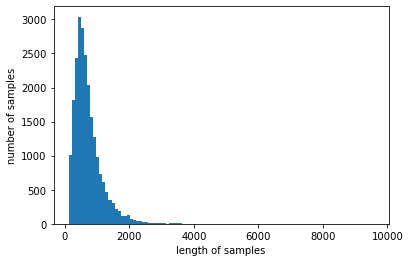

In [185]:
print('뉴스의 최대 길이 :',max(len(l) for l in news_text_df.text))
print('뉴스의 최소 길이 :',min(len(l) for l in news_text_df.text))
print('뉴스의 평균 길이 :',sum(map(len, news_text_df.text))/len(news_text_df.text))
plt.hist([len(s) for s in news_text_df.text], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [167]:
news_text_df.reset_index(inplace=True)

In [171]:
c=1
for i,v in enumerate(news_text_df.text):
    if len(v)<130:
        news_text_df.drop(i,inplace=True)

In [177]:
news_text_df

,label,text
0,사회,"제주 이승용 변호사 살인사건, 교사범 송환·조사 제주 장기 미제 중 하나인 이승용 ..."
1,사회,"제주형 지하수 모델, 저명 국제학술지 실려 기존화산섬 지하수 모델과 차별화된 제주형..."
2,사회,제주 평화리더 500人 페스티벌 유튜브 생중계 제주 평화리더 500人 페스티벌이 오...
3,사회,제주 노래방 관련 확진자만 74명 제주도내 코로나19 집단감염 사례가 하루가 멀다하...
4,사회,백신 접종자 4인까지 모임 허용... 제주는? 정부가 현행 사회적 거리두기를 2주 ...
...,...,...
24198,제주관광,중문면세점 개점 5주년...이벤트 팡팡 제주관광공사(사장 양영근)는 중문면세점 개...
24199,사회,"정의당 도당 ""제주의 물 팔아먹는 것이 새정치는 아니"" 한국공항의 지하수 증산안이 ..."
24200,경제,제주에너지공사 출범 2년 째 지속적인 흑자 달성 제주에너지공사가 출범 첫 해 흑자에...
24202,사회,"제주국제공항, 다채로운 문화행사로 북적북적 한국공항공사 제주지역본부(본부장 신종균)..."


In [186]:
pd.DataFrame(news_text_df).to_csv('기타/제주news_text.csv',index=False)